In [15]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("pratyushpuri/multilingual-mobile-app-reviews-dataset-2025")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\MSI\.cache\kagglehub\datasets\pratyushpuri\multilingual-mobile-app-reviews-dataset-2025\versions\1


In [16]:
# Đọc dữ liệu từ file CSV
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

dataset_path = r"C:\Users\MSI\.cache\kagglehub\datasets\pratyushpuri\multilingual-mobile-app-reviews-dataset-2025\versions\1"

csv_file = os.path.join(dataset_path, "multilingual_mobile_app_reviews_2025.csv")

print("📊 Đang đọc dữ liệu...")
df = pd.read_csv(csv_file)

print("✅ Dữ liệu đã được đọc thành công!")
print(f"📈 Kích thước dataset: {df.shape[0]:,} hàng và {df.shape[1]} cột")
print(f"💾 Dung lượng trong bộ nhớ: {df.memory_usage(deep=True).sum() / 1024 / 1024:.2f} MB")

📊 Đang đọc dữ liệu...
✅ Dữ liệu đã được đọc thành công!
📈 Kích thước dataset: 2,514 hàng và 15 cột
💾 Dung lượng trong bộ nhớ: 1.47 MB


In [17]:
# Xem thông tin tổng quan về dataset
print("🔍 THÔNG TIN TỔNG QUAN VỀ DATASET")
print("=" * 60)

print("\n📋 Danh sách các cột:")
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")

print(f"\n📊 Kiểu dữ liệu của các cột:")
print(df.dtypes)

print(f"\n❓ Số lượng giá trị null trong từng cột:")
null_counts = df.isnull().sum()
for col, null_count in null_counts.items():
    if null_count > 0:
        percentage = (null_count / len(df)) * 100
        print(f"   {col}: {null_count:,} ({percentage:.1f}%)")
    else:
        print(f"   {col}: 0")

print(f"\n📈 Thống kê mô tả:")
print(df.describe())

🔍 THÔNG TIN TỔNG QUAN VỀ DATASET

📋 Danh sách các cột:
 1. review_id
 2. user_id
 3. app_name
 4. app_category
 5. review_text
 6. review_language
 7. rating
 8. review_date
 9. verified_purchase
10. device_type
11. num_helpful_votes
12. user_age
13. user_country
14. user_gender
15. app_version

📊 Kiểu dữ liệu của các cột:
review_id              int64
user_id                int64
app_name              object
app_category          object
review_text           object
review_language       object
rating               float64
review_date           object
verified_purchase       bool
device_type           object
num_helpful_votes      int64
user_age             float64
user_country          object
user_gender           object
app_version           object
dtype: object

❓ Số lượng giá trị null trong từng cột:
   review_id: 0
   user_id: 0
   app_name: 0
   app_category: 0
   review_text: 59 (2.3%)
   review_language: 0
   rating: 37 (1.5%)
   review_date: 0
   verified_purchase: 0
   device_

In [12]:
# Xem một vài mẫu dữ liệu
print("📝 MOTE VÀI MẪU DỮ LIỆU")
print("=" * 50)

print("\n🔝 5 hàng đầu tiên:")
print(df.head())

print("\n🔚 5 hàng cuối cùng:")
print(df.tail())

print("\n🎲 5 mẫu ngẫu nhiên:")
print(df.sample(5, random_state=42))

📝 MOTE VÀI MẪU DỮ LIỆU

🔝 5 hàng đầu tiên:
   review_id  user_id      app_name    app_category  \
0          1  1967825     MX Player  Travel & Local   
1          2  9242600        Tinder      Navigation   
2          3  7636477       Netflix          Dating   
3          4   209031         Venmo    Productivity   
4          5  7190293  Google Drive       Education   

                                         review_text review_language  rating  \
0  Qui doloribus consequuntur. Perspiciatis tempo...              no     1.3   
1  Great app but too many ads, consider premium v...              ru     1.6   
2  The interface could be better but overall good...              es     3.6   
3  Latest update broke some features, please fix ...              vi     3.8   
4  Perfect for daily use, highly recommend to eve...              tl     3.2   

           review_date  verified_purchase     device_type  num_helpful_votes  \
0  2024-10-09 19:26:40               True  Android Tablet        

🌍 PHÂN TÍCH PHÂN BỐ NGÔN NGỮ

📊 Số lượng ngôn ngữ khác nhau: 24

📈 Top 10 ngôn ngữ phổ biến nhất:
 1. ru: 134 (5.3%)
 2. pl: 122 (4.9%)
 3. es: 119 (4.7%)
 4. nl: 116 (4.6%)
 5. tl: 114 (4.5%)
 6. ko: 114 (4.5%)
 7. fi: 111 (4.4%)
 8. id: 111 (4.4%)
 9. ar: 108 (4.3%)
10. da: 105 (4.2%)


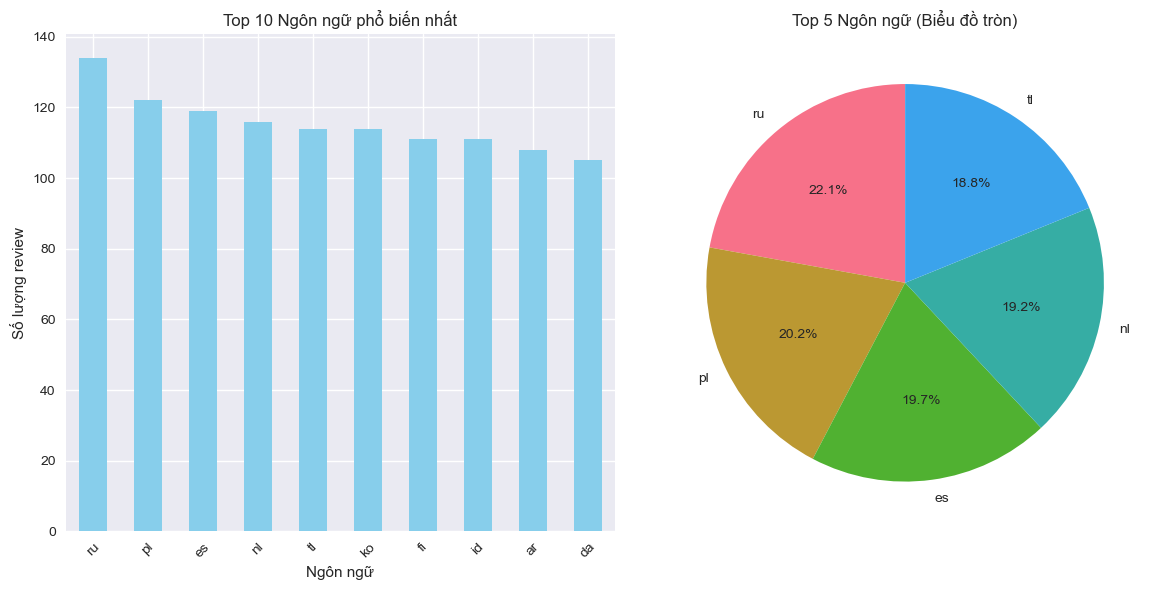

In [18]:
# Phân tích phân bố ngôn ngữ
print("🌍 PHÂN TÍCH PHÂN BỐ NGÔN NGỮ")
print("=" * 50)

language_counts = df['review_language'].value_counts()
print(f"\n📊 Số lượng ngôn ngữ khác nhau: {len(language_counts)}")
print(f"\n📈 Top 10 ngôn ngữ phổ biến nhất:")
for i, (lang, count) in enumerate(language_counts.head(10).items(), 1):
    percentage = (count / len(df)) * 100
    print(f"{i:2d}. {lang}: {count:,} ({percentage:.1f}%)")

# Tạo biểu đồ phân bố ngôn ngữ
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
language_counts.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Ngôn ngữ phổ biến nhất')
plt.xlabel('Ngôn ngữ')
plt.ylabel('Số lượng review')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.pie(language_counts.head(5), labels=language_counts.head(5).index, autopct='%1.1f%%', startangle=90)
plt.title('Top 5 Ngôn ngữ (Biểu đồ tròn)')

plt.tight_layout()
plt.show()

⭐ PHÂN TÍCH RATING VÀ CATEGORIES

📊 Phân bố Rating:
⭐ 1.0: 31 (1.3%)
⭐ 1.1: 75 (3.0%)
⭐ 1.2: 60 (2.4%)
⭐ 1.3: 47 (1.9%)
⭐ 1.4: 50 (2.0%)
⭐ 1.5: 49 (2.0%)
⭐ 1.6: 61 (2.5%)
⭐ 1.7: 66 (2.7%)
⭐ 1.8: 61 (2.5%)
⭐ 1.9: 45 (1.8%)
⭐ 2.0: 73 (2.9%)
⭐ 2.1: 58 (2.3%)
⭐ 2.2: 62 (2.5%)
⭐ 2.3: 62 (2.5%)
⭐ 2.4: 74 (3.0%)
⭐ 2.5: 55 (2.2%)
⭐ 2.6: 73 (2.9%)
⭐ 2.7: 70 (2.8%)
⭐ 2.8: 70 (2.8%)
⭐ 2.9: 56 (2.3%)
⭐ 3.0: 52 (2.1%)
⭐ 3.1: 65 (2.6%)
⭐ 3.2: 75 (3.0%)
⭐ 3.3: 69 (2.8%)
⭐ 3.4: 57 (2.3%)
⭐ 3.5: 58 (2.3%)
⭐ 3.6: 81 (3.3%)
⭐ 3.7: 61 (2.5%)
⭐ 3.8: 54 (2.2%)
⭐ 3.9: 59 (2.4%)
⭐ 4.0: 61 (2.5%)
⭐ 4.1: 56 (2.3%)
⭐ 4.2: 45 (1.8%)
⭐ 4.3: 55 (2.2%)
⭐ 4.4: 72 (2.9%)
⭐ 4.5: 64 (2.6%)
⭐ 4.6: 62 (2.5%)
⭐ 4.7: 66 (2.7%)
⭐ 4.8: 69 (2.8%)
⭐ 4.9: 63 (2.5%)
⭐ 5.0: 35 (1.4%)

📈 Thống kê Rating:
   Rating trung bình: 3.02
   Rating cao nhất: 5.0
   Rating thấp nhất: 1.0

📱 Phân bố App Categories:
Số lượng categories: 18

Top 10 categories phổ biến nhất:
 1. Entertainment: 167 (6.6%)
 2. Navigation: 161 (6.4%)
 3. Travel & 

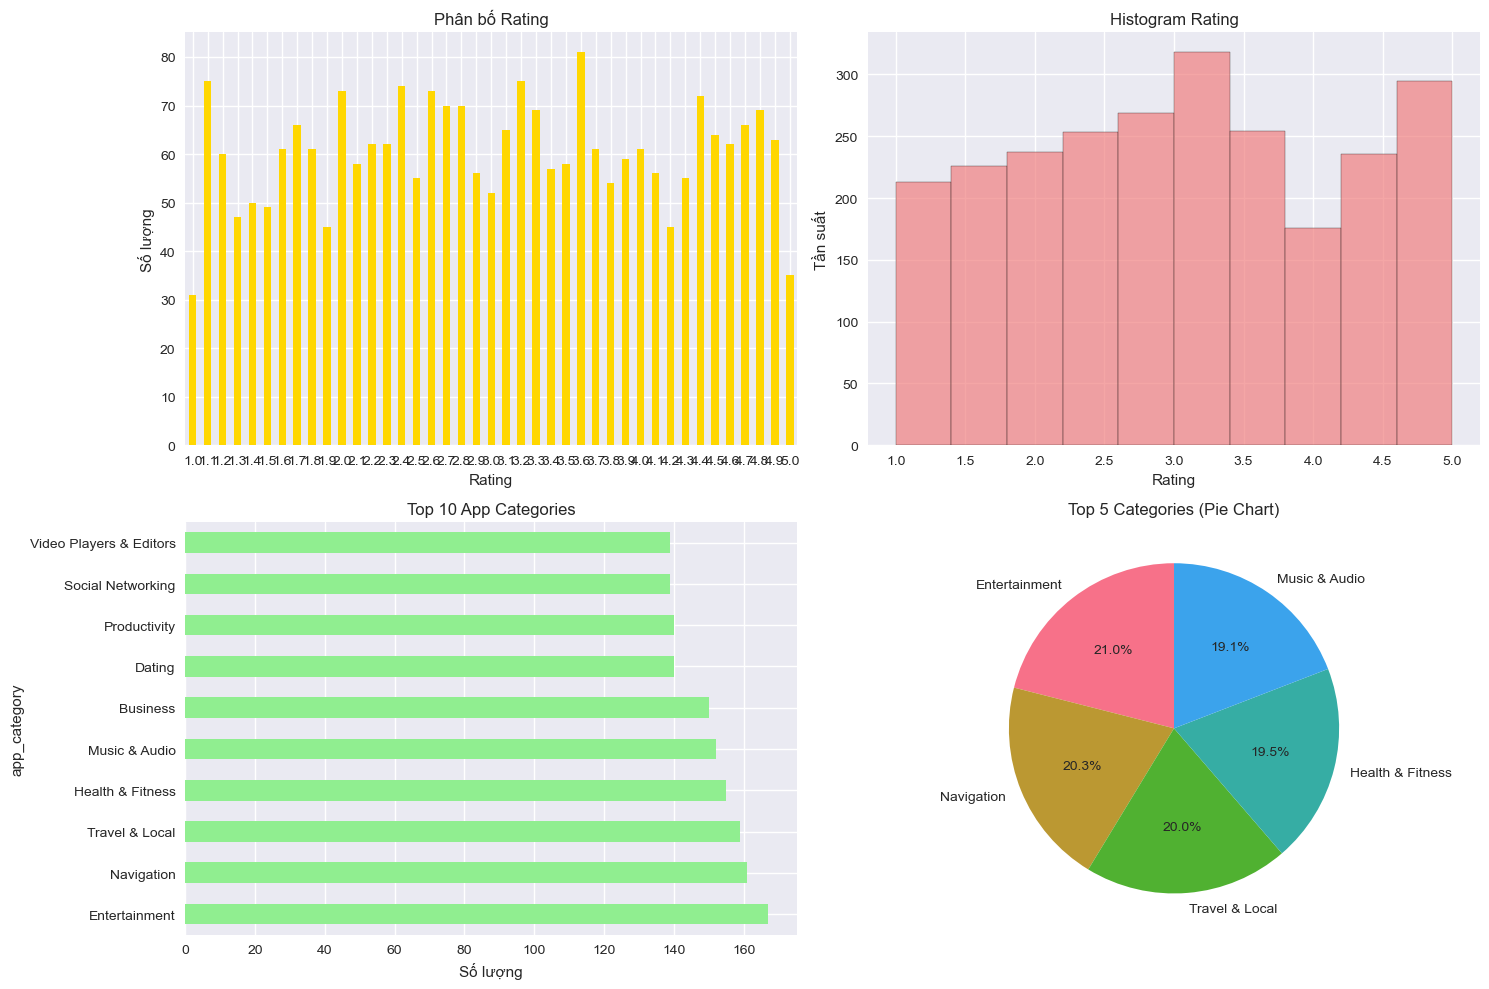

In [14]:
# Phân tích Rating và App Categories
print("⭐ PHÂN TÍCH RATING VÀ CATEGORIES")
print("=" * 50)

# Phân tích Rating
print("\n📊 Phân bố Rating:")
rating_counts = df['rating'].value_counts().sort_index()
for rating, count in rating_counts.items():
    if pd.notna(rating):
        percentage = (count / len(df[df['rating'].notna()])) * 100
        print(f"⭐ {rating}: {count:,} ({percentage:.1f}%)")

print(f"\n📈 Thống kê Rating:")
print(f"   Rating trung bình: {df['rating'].mean():.2f}")
print(f"   Rating cao nhất: {df['rating'].max()}")
print(f"   Rating thấp nhất: {df['rating'].min()}")

# Phân tích App Categories
print(f"\n📱 Phân bố App Categories:")
category_counts = df['app_category'].value_counts()
print(f"Số lượng categories: {len(category_counts)}")
print(f"\nTop 10 categories phổ biến nhất:")
for i, (cat, count) in enumerate(category_counts.head(10).items(), 1):
    percentage = (count / len(df)) * 100
    print(f"{i:2d}. {cat}: {count:,} ({percentage:.1f}%)")

# Tạo biểu đồ
plt.figure(figsize=(15, 10))

# Biểu đồ rating
plt.subplot(2, 2, 1)
rating_counts.plot(kind='bar', color='gold')
plt.title('Phân bố Rating')
plt.xlabel('Rating')
plt.ylabel('Số lượng')
plt.xticks(rotation=0)

# Biểu đồ histogram rating
plt.subplot(2, 2, 2)
plt.hist(df['rating'].dropna(), bins=10, color='lightcoral', alpha=0.7, edgecolor='black')
plt.title('Histogram Rating')
plt.xlabel('Rating')
plt.ylabel('Tần suất')

# Biểu đồ top categories
plt.subplot(2, 2, 3)
category_counts.head(10).plot(kind='barh', color='lightgreen')
plt.title('Top 10 App Categories')
plt.xlabel('Số lượng')

# Biểu đồ pie chart cho top 5 categories
plt.subplot(2, 2, 4)
plt.pie(category_counts.head(5), labels=category_counts.head(5).index, autopct='%1.1f%%', startangle=90)
plt.title('Top 5 Categories (Pie Chart)')

plt.tight_layout()
plt.show()